In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

In [30]:
%matplotlib inline

# pi pulse 만들어서 qutip 으로 시각화
X,Y drive line capacitvely coupled with qubit (Assuming weak coupling)
$$H(t) = H_0 +H_d(t) $$
$$H(t) = -\frac{1}{2}\omega_q \sigma_z + \Omega V_d(t) \sigma_y $$
$\Omega=(C_d/C_{\Sigma})Q_{zpf}$ and $V_d(t)=V_0s(t)\sin(\omega_dt+\phi)$

rotating frame 에서 RWA 까지 하면

$$
\tilde{H}_{d}(t)=-\frac{1}{2}\Omega V_0 S_{\theta}(t)
\begin{pmatrix}
0 & e^{i(\delta\omega t+\phi)} \\
e^{-i(\delta\omega t+\phi)} & 0 
\end{pmatrix} \qquad (90)
$$

In [2]:
def make_U(H, time_step):
    """
    PARAMETER
        Hamiltonian : function of t
        time_step : float
    RETURNS
        U : function of t
    """
    hbar = 1.
    I = np.identity(2,dtype="complex128")
    
    def U(t):
        total = I #U(t=0)
        check = [I]
        times = np.arange(start=0,stop=t,step=time_step)
        for time in times:
            derivative = (-1j/hbar)*np.matmul(H(time),total)*time_step
            total = total + derivative
            check.append(total) 
        return total, np.array(check)
        

    return U

In [ ]:
def make_H_d(Omega,V_0,delta_omega,phi,s):
    """
    PARAMETER
        -s:function 
    RETURN 
        -H: time-dependent Hamiltonian (Hermitian for all t)
    """ 
    
    def H(t):
        matrix=np.zeros((2,2),dtype='complex128')
        matrix[0][1]=np.exp((1j)*(delta_omega*t))
        matrix[1][0]=np.exp((-1j)*(delta_omega*t))
    
        return (-0.5)*Omega*V_0*s(t)*matrix
    
    return H

Let's make $\pi$ pulse! 

## Setting
Detuning
$\delta \omega = 0.001$
$\Omega=1.$
$\phi=0.1$
$\hbar=1.$

In [4]:
delta_omega=0.001
phi=0.1
Omega=1.
V_0=1.

In [37]:
def s(t):
    constant=(np.pi)**2/(160.*Omega*V_0)
    if 0 <= t <= 80.:
        return (0.1)*np.sin(((np.pi)/80.)*t) 
    else:
        return 0

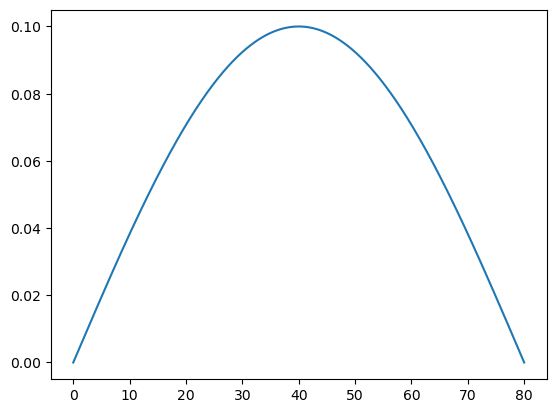

In [38]:
fig, ax =plt.subplots()
times1=np.arange(start=0,stop=80.+(1e-4),step=1e-4)
ax.plot(times1, [s(time) for time in times1])

In [39]:
testH=make_H_d(Omega=1.,V_0=1.,delta_omega=0.001,phi=0.1,s=s)
testU = make_U(testH,1e-4)

In [40]:
transition , info = testU(80.)

In [41]:
#checking unitarity
np.matmul(transition,np.matrix.getH(transition))
#looks okay

array([[1.00001000e+00-5.11421037e-19j, 3.10042195e-18+1.51315963e-18j],
       [3.10042195e-18-5.54920059e-18j, 1.00001000e+00+1.05736243e-18j]])

### checking convergence
뭐지  안갈라지지?
10e-4
10e-5 
s(t) amp=1 로  두고 t=80. 까지 했는데 안갈라짐..
amp=10 으로 둬 보겠음

In [42]:
testU2 = make_U(testH,1e-5) 
testU3 = make_U(testH,1e-1)

In [43]:
transition2, info2 = testU2(80.)
transition3, info3 = testU3(80.)

In [44]:
len(info2)-len(info3)

7999200

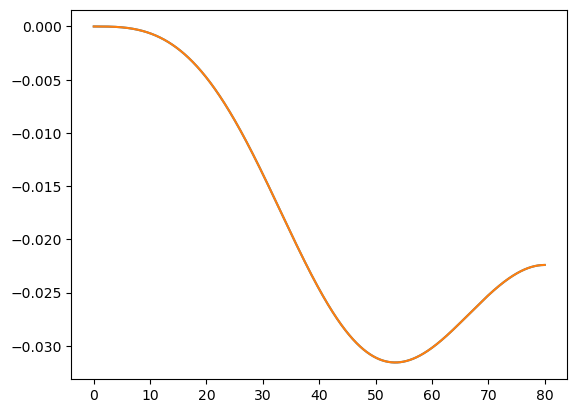

In [45]:
fig, ax =plt.subplots()
ax.plot(np.arange(start=0,stop=80.+(1e-4),step=1e-4), [v[0][1] for v in info])
ax.plot(np.arange(start=0,stop=80.+(1e-5),step=1e-5), [v[0][1] for v in info2])
#ax.plot(np.arange(start=0,stop=80.+(1e-1),step=1e-1), [v[0][1] for v in info3]) 

In [46]:
#initializing qubit at ground state
initial_state = np.array([[1.,0]],dtype="complex128").T

In [29]:
transition_state=np.matmul(transition,initial_state)

In [ ]:
Bloch=qutip.Bloch()
Bloch.render()
Bloch.show()